In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence as oi



%matplotlib inline
style.use("fivethirtyeight")

from google.colab import files

uploaded = files.upload()

In [ ]:
df = pd.read_excel("DatosEducacionDiffDiffFinal.xlsx")

In [ ]:
df.head(10)

,DIRECTORIO,P1_DEPARTAMENTO,SECUENCIA_ENCUESTA,NivelEducativoCursado,TipoEstablecimiento,UbicacionColegio,MinutosAColegio,AlimentosEscuela,RecibioBeca,Tratamiento,TratamientoFin,Año,Grupo
0,3013752,25,3,4,1,1,45,0,0,0.997964,1,0,TratamientoPre
1,3003749,25,2,2,1,1,40,1,0,0.997443,1,0,TratamientoPre
2,3016628,25,4,2,0,1,5,1,0,0.996477,1,0,TratamientoPre
3,2998448,25,3,4,1,1,20,0,0,0.996050,1,0,TratamientoPre
4,3008596,25,2,7,1,1,120,0,0,0.992672,1,0,TratamientoPre
5,3008462,25,4,3,1,1,10,0,0,0.992579,1,0,TratamientoPre
6,3008753,25,4,3,1,1,5,0,0,0.987130,1,0,TratamientoPre
7,3013627,25,3,2,1,2,60,1,0,0.987057,1,0,TratamientoPre
8,3003746,25,4,3,1,1,10,1,0,0.984057,1,0,TratamientoPre
9,3013675,25,3,4,1,1,100,1,0,0.983895,1,0,TratamientoPre


In [ ]:
poa_before = df.query("TratamientoFin==1 & Año==0")["NivelEducativoCursado"].mean()

poa_after = df.query("TratamientoFin==1 & Año==1")["NivelEducativoCursado"].mean()

poa_after - poa_before

0.028876470855481617

In [ ]:
fl_after = df.query("TratamientoFin==0 & Año==1")["NivelEducativoCursado"].mean()
poa_after - fl_after

-0.024558780781529066

In [ ]:
fl_before = df.query("TratamientoFin==0 & Año==0")["NivelEducativoCursado"].mean()
fl_after - fl_before

-0.0630372492836675

In [ ]:
diff_in_diff = (poa_after-poa_before)-(fl_after-fl_before)
diff_in_diff

0.09191372013914911

Para hacer la grafica que aparece abajo de manera correcta, es necesario

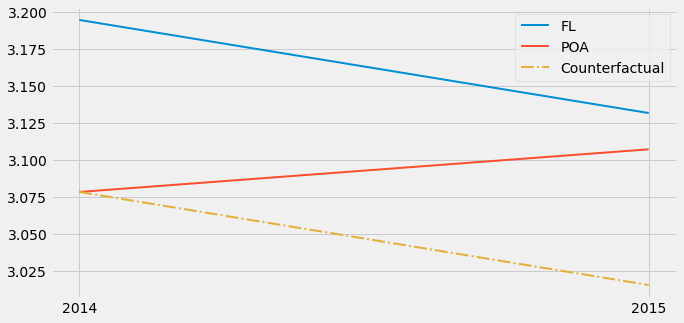

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(["2014", "2015"], [fl_before, fl_after], label="FL", lw=2)
plt.plot(["2014", "2015"], [poa_before, poa_after], label="POA", lw=2)

plt.plot(["2014", "2015"], [poa_before, poa_before+(fl_after-fl_before)],
         label="Counterfactual", lw=2, color="C2", ls="-.")

plt.legend();

In [ ]:
results = smf.ols('NivelEducativoCursado ~ TratamientoFin*Año + TipoEstablecimiento + UbicacionColegio + MinutosAColegio', data=df).fit()
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     NivelEducativoCursado   R-squared:                       0.274
Model:                               OLS   Adj. R-squared:                  0.271
Method:                    Least Squares   F-statistic:                     85.22
Date:                   Tue, 17 May 2022   Prob (F-statistic):           1.08e-90
Time:                           18:36:37   Log-Likelihood:                -2337.8
No. Observations:                   1362   AIC:                             4690.
Df Residuals:                       1355   BIC:                             4726.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Inte